In [ ]:
import cv2

# Create a 3D cube
points = np.array([[-1, -1, -1],
                   [-1, 1, -1 ],
                   [1, 1, -1 ],
                   [1,-1, -1 ],
                   [-1,-1, 1 ],
                   [-1, 1, 1 ],
                   [1, 1, 1 ],
                   [1,-1, 1 ]])

edges = np.array([[0, 1], [0, 3], [0, 4], [2, 1], [2, 3], [2, 6], [5, 4], [5, 6], [5, 1], [7, 6], [7, 4], [7, 3]])

# Create an empty image
img = np.zeros((512,512))

# Project the points onto the image plane
focal_length = img.shape[0]
center = (img.shape[0]/2,img.shape[1]/2)
camera_matrix = np.array([[focal_length,0,img.shape[0]/2],
                          [0,focal_length,img.shape[1]/2],
                          [0,0,1]],dtype = "double")

dist_coeffs = np.zeros((4,1))

(_, _, _, _, _, rotation_vector,
 translation_vector) = cv2.solvePnP(points,
                                    edges,
                                    camera_matrix,
                                    dist_coeffs)

box = np.float32([[0,-0.5,-0.5],
                  [0,-0.5,+0.5],
                  [0,+0.5,+0.5],
                  [0,+0.5,-0.5],
                  [-2,-2,-2]])

imgpts,_ = cv2.projectPoints(box,
                             rotation_vector,
                             translation_vector,
                             camera_matrix,
                             dist_coeffs)

imgpts = np.int32(imgpts).reshape(-1,2)

# Draw the edges
for i,j in edges:
    (x,y) = imgpts[i]
    (x2,y2) = imgpts[j]
    cv2.line(img,(x,y),(x2,y2),(255),thickness=9)

# Save the left and right images
cv2.imwrite("left.png", img)
cv2.imwrite("right.png", img)

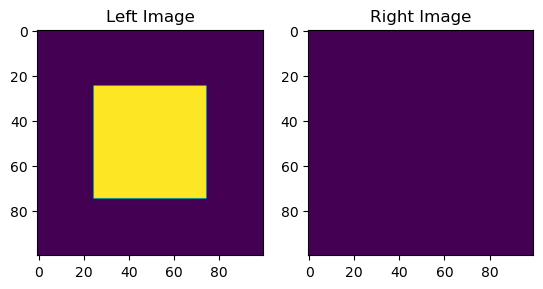

In [4]:
import numpy as np
from PIL import Image
# from stereoscopy import StereoImage

# Generate 3D cube
cube = np.zeros((100, 100, 100))
cube[25:75, 25:75, 25:75] = 1

# Generate left and right images
left_image = Image.fromarray(cube[:, :, 50].astype(np.uint8))
right_image = Image.fromarray(cube[:, :, 75].astype(np.uint8))
import matplotlib.pyplot as plt

# Show left and right images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(left_image)
axs[0].set_title('Left Image')
axs[1].imshow(right_image)
axs[1].set_title('Right Image')
plt.show()

# Generate stereo image
# stereo_image = StereoImage(left_image, right_image)
# stereo_image.save('stereo_image.png')

ValueError: x and y arrays must consist of at least 3 unique points

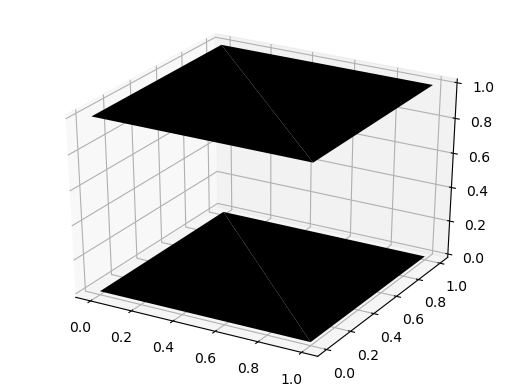

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Cube vertices
verts = [
    [0, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
    [1, 0, 1]
]

# Cube faces
faces = [
    [verts[0], verts[1], verts[2], verts[3]],
    [verts[4], verts[5], verts[6], verts[7]],
    [verts[0], verts[4], verts[5], verts[1]],
    [verts[2], verts[6], verts[7], verts[3]],
    [verts[0], verts[4], verts[7], verts[3]],
    [verts[1], verts[5], verts[6], verts[2]]
]

# Textures for each face
textures = [
    '1.png',
    '2.png',
    '3.png',
    '4.png',
    '5.png',
    '6.png'
]

for i in range(6):
    face = faces[i]
    texture = textures[i]
    
    x = [vertex[0] for vertex in face]
    y = [vertex[1] for vertex in face]
    z = [vertex[2] for vertex in face]
    
    ax.plot_trisurf(x,y,z,cmap='gray', linewidth=0.2)

#get current axes
ax = plt.gca()

#hide axes and borders
plt.axis('off')
plt.axis('off')
plt.show()


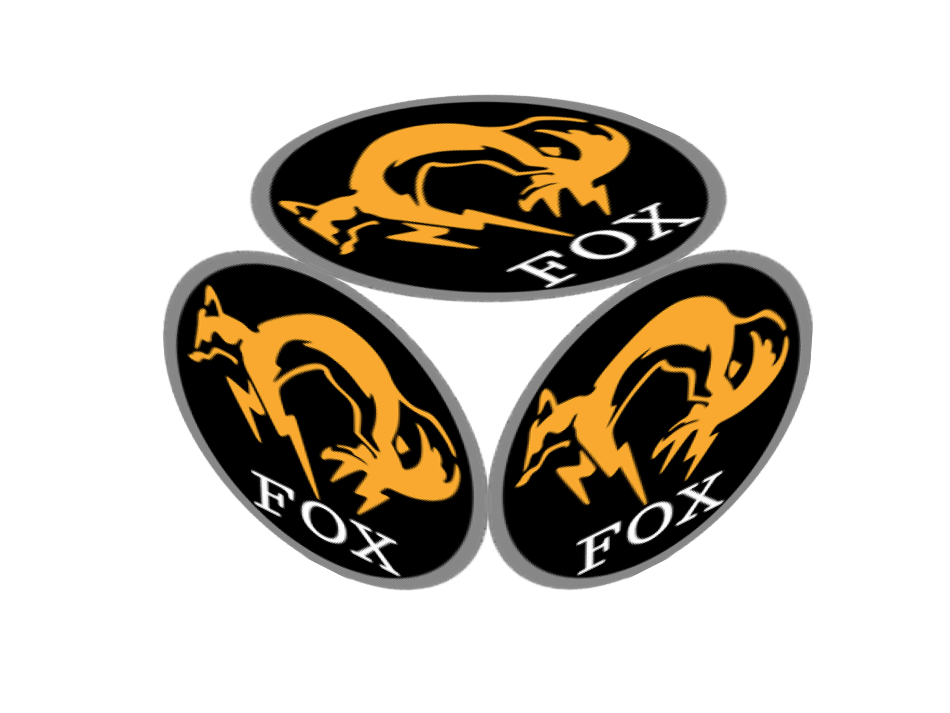

In [4]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt

C = image.imread('foxhound-logo-png-8.png')

xp, yp, __ = C.shape

x = np.arange(0, xp, 1)
y = np.arange(0, yp, 1)
Y, X = np.meshgrid(y, x)

fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax.dist=6.2
ax.view_init(elev=38, azim=-45)

ax.plot_surface(X, Y, X-X+yp, facecolors=C,
                rstride=2, cstride=2,
                antialiased=True, shade=False)

ax.plot_surface(X, X-X, Y, facecolors=np.fliplr(C.transpose((1,0,2))),
                rstride=2, cstride=2,
                antialiased=True, shade=False)

ax.plot_surface(X-X+xp, X, Y, facecolors=np.fliplr(C.transpose((1,0,2))),
                rstride=2, cstride=2,
                antialiased=True, shade=False)
# plt.axis('equal')
plt.axis('off')
plt.show()

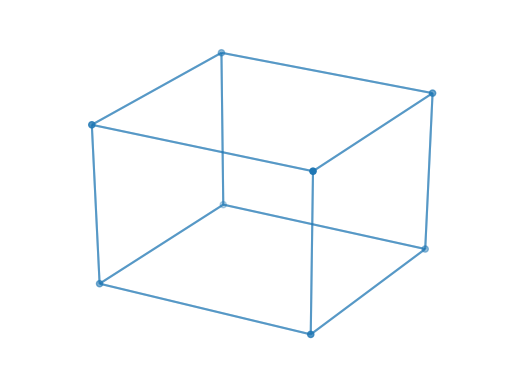

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_wireframe(X,Y,one, alpha=0.5)
ax.plot_wireframe(X,Y,-one, alpha=0.5)
ax.plot_wireframe(X,-one,Y, alpha=0.5)
ax.plot_wireframe(X,one,Y, alpha=0.5)
ax.plot_wireframe(one,X,Y, alpha=0.5)
ax.plot_wireframe(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.axis('off')
plt.show()

In [5]:
import plotly.graph_objs as go
import numpy as np
from PIL import Image

# Define the vertices of the cube
vertices = [
    [0, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
    [1, 0, 1]
]

# Define the faces of the cube
faces = [
    [vertices[0], vertices[1], vertices[2], vertices[3]],
    [vertices[4], vertices[5], vertices[6], vertices[7]],
    [vertices[0], vertices[4], vertices[5], vertices[1]],
    [vertices[2], vertices[6], vertices[7], vertices[3]],
    [vertices[0], vertices[4], vertices[7], vertices[3]],
    [vertices[1], vertices[5], vertices[6], vertices[2]]
]

# Define the textures for each face
textures = [
    '1.png',
    '2.png',
    '3.png',
    '4.png',
    '5.png',
    '6.png'
]

# Define the data for each face
data = []
for i in range(6):
    face = faces[i]
    # texture = textures[i]
    texture = np.asarray(Image.open(textures[i])).T

    x = [vertex[0] for vertex in face]
    y = [vertex[1] for vertex in face]
    z = [vertex[2] for vertex in face]
    
    data.append(
        go.Mesh3d(
            x=x,
            y=y,
            z=z,
            i=[0, 0, 0, 0],
            j=[1, 2, 3, 4],
            k=[2, 3, 4, 1],
            name='face{}'.format(i),
            colorscale='Viridis',
            showscale=False,
            intensity=x,
            flatshading=True,
            surfacecolor=texture,
            facecolor=[],
        )
    )

# Define the layout of the plot
layout = go.Layout(
    title='3D Cube with Different Textures on Every Surface',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z'),
        aspectmode='cube'
    )
)

# Create the figure and show it
fig = go.Figure(data=data, layout=layout)
# fig.axis('off')
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Mesh3d: 'surfacecolor'

Did you mean "facecolor"?

    Valid properties:
        alphahull
            Determines how the mesh surface triangles are derived
            from the set of vertices (points) represented by the
            `x`, `y` and `z` arrays, if the `i`, `j`, `k` arrays
            are not supplied. For general use of `mesh3d` it is
            preferred that `i`, `j`, `k` are supplied. If "-1",
            Delaunay triangulation is used, which is mainly
            suitable if the mesh is a single, more or less layer
            surface that is perpendicular to `delaunayaxis`. In
            case the `delaunayaxis` intersects the mesh surface at
            more than one point it will result triangles that are
            very long in the dimension of `delaunayaxis`. If ">0",
            the alpha-shape algorithm is used. In this case, the
            positive `alphahull` value signals the use of the
            alpha-shape algorithm, _and_ its value acts as the
            parameter for the mesh fitting. If 0,  the convex-hull
            algorithm is used. It is suitable for convex bodies or
            if the intention is to enclose the `x`, `y` and `z`
            point set into a convex hull.
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here `intensity`) or
            the bounds set in `cmin` and `cmax` Defaults to `false`
            when `cmin` and `cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Value should
            have the same units as `intensity` and if set, `cmin`
            must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `cmin` and/or `cmax` to be equidistant to this point.
            Value should have the same units as `intensity`. Has no
            effect when `cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Value should
            have the same units as `intensity` and if set, `cmax`
            must be set as well.
        color
            Sets the color of the whole mesh
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.mesh3d.ColorBar` instance
            or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use `cmin` and `cmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Blackbody,Bluered,Blues,C
            ividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portl
            and,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd.
        contour
            :class:`plotly.graph_objects.mesh3d.Contour` instance
            or dict with compatible properties
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        delaunayaxis
            Sets the Delaunay axis, which is the axis that is
            perpendicular to the surface of the Delaunay
            triangulation. It has an effect if `i`, `j`, `k` are
            not provided and `alphahull` is set to indicate
            Delaunay triangulation.
        facecolor
            Sets the color of each face Overrides "color" and
            "vertexcolor".
        facecolorsrc
            Sets the source reference on Chart Studio Cloud for
            `facecolor`.
        flatshading
            Determines whether or not normal smoothing is applied
            to the meshes, creating meshes with an angular, low-
            poly look via flat reflections.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.mesh3d.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        i
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "first" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}` together represent face m (triangle m) in
            the mesh, where `i[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `i` represents a point in space, which
            is the first vertex of a triangle.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        intensity
            Sets the intensity values for vertices or cells as
            defined by `intensitymode`. It can be used for plotting
            fields on meshes.
        intensitymode
            Determines the source of `intensity` values.
        intensitysrc
            Sets the source reference on Chart Studio Cloud for
            `intensity`.
        isrc
            Sets the source reference on Chart Studio Cloud for
            `i`.
        j
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "second" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}`  together represent face m (triangle m) in
            the mesh, where `j[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `j` represents a point in space, which
            is the second vertex of a triangle.
        jsrc
            Sets the source reference on Chart Studio Cloud for
            `j`.
        k
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "third" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}` together represent face m (triangle m) in
            the mesh, where `k[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `k` represents a point in space, which
            is the third vertex of a triangle.
        ksrc
            Sets the source reference on Chart Studio Cloud for
            `k`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.mesh3d.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        lighting
            :class:`plotly.graph_objects.mesh3d.Lighting` instance
            or dict with compatible properties
        lightposition
            :class:`plotly.graph_objects.mesh3d.Lightposition`
            instance or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the surface. Please note that in
            the case of using high `opacity` values for example a
            value greater than or equal to 0.5 on two surfaces (and
            0.25 with four surfaces), an overlay of multiple
            transparent surfaces may not perfectly be sorted in
            depth by the webgl API. This behavior may be improved
            in the near future and is subject to change.
        reversescale
            Reverses the color mapping if true. If true, `cmin`
            will correspond to the last color in the array and
            `cmax` will correspond to the first color.
        scene
            Sets a reference between this trace's 3D coordinate
            system and a 3D scene. If "scene" (the default value),
            the (x,y,z) coordinates refer to `layout.scene`. If
            "scene2", the (x,y,z) coordinates refer to
            `layout.scene2`, and so on.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.mesh3d.Stream` instance or
            dict with compatible properties
        text
            Sets the text elements associated with the vertices. If
            trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        vertexcolor
            Sets the color of each vertex Overrides "color". While
            Red, green and blue colors are in the range of 0 and
            255; in the case of having vertex color data in RGBA
            format, the alpha color should be normalized to be
            between 0 and 1.
        vertexcolorsrc
            Sets the source reference on Chart Studio Cloud for
            `vertexcolor`.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the X coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the Y coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        z
            Sets the Z coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        zcalendar
            Sets the calendar system to use with `z` date data.
        zhoverformat
            Sets the hover text formatting rulefor `z`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `zaxis.hoverformat`.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "facecolor"?

Bad property path:
surfacecolor
^^^^^^^^^^^^

https://ieeexplore.ieee.org/document/8346440